In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import pandas_ta as ta

In [2]:
df= pd.read_csv('monthly-beer-production-in-austr.csv',parse_dates=['Month'])
df.head()

,Month,Monthly beer production
0,1956-01-01,93.2
1,1956-02-01,96.0
2,1956-03-01,95.2
3,1956-04-01,77.1
4,1956-05-01,70.9


In [3]:
df['Day'] = df.Month.dt.day
df

,Month,Monthly beer production,Day
0,1956-01-01,93.2,1
1,1956-02-01,96.0,1
2,1956-03-01,95.2,1
3,1956-04-01,77.1,1
4,1956-05-01,70.9,1
...,...,...,...
471,1995-04-01,127.0,1
472,1995-05-01,151.0,1
473,1995-06-01,130.0,1
474,1995-07-01,119.0,1


In [4]:
df['Year'] = df.Month.dt.year
df['months'] = df.Month.dt.month
df['Day of week'] = df.Month.dt.dayofweek
df['Week'] = df.Month.dt.week

C:\Users\haris\AppData\Local\Temp\ipykernel_8744\43735815.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Week'] = df.Month.dt.week


In [5]:
df

,Month,Monthly beer production,Day,Year,months,Day of week,Week
0,1956-01-01,93.2,1,1956,1,6,52
1,1956-02-01,96.0,1,1956,2,2,5
2,1956-03-01,95.2,1,1956,3,3,9
3,1956-04-01,77.1,1,1956,4,6,13
4,1956-05-01,70.9,1,1956,5,1,18
...,...,...,...,...,...,...,...
471,1995-04-01,127.0,1,1995,4,5,13
472,1995-05-01,151.0,1,1995,5,0,18
473,1995-06-01,130.0,1,1995,6,3,22
474,1995-07-01,119.0,1,1995,7,5,26


In [6]:
def weekend(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

In [7]:
df['Weekend'] =df['Month'].apply(weekend)
df

,Month,Monthly beer production,Day,Year,months,Day of week,Week,Weekend
0,1956-01-01,93.2,1,1956,1,6,52,1
1,1956-02-01,96.0,1,1956,2,2,5,0
2,1956-03-01,95.2,1,1956,3,3,9,0
3,1956-04-01,77.1,1,1956,4,6,13,1
4,1956-05-01,70.9,1,1956,5,1,18,0
...,...,...,...,...,...,...,...,...
471,1995-04-01,127.0,1,1995,4,5,13,1
472,1995-05-01,151.0,1,1995,5,0,18,0
473,1995-06-01,130.0,1,1995,6,3,22,0
474,1995-07-01,119.0,1,1995,7,5,26,1


Text(0, 0.5, 'Beer production')

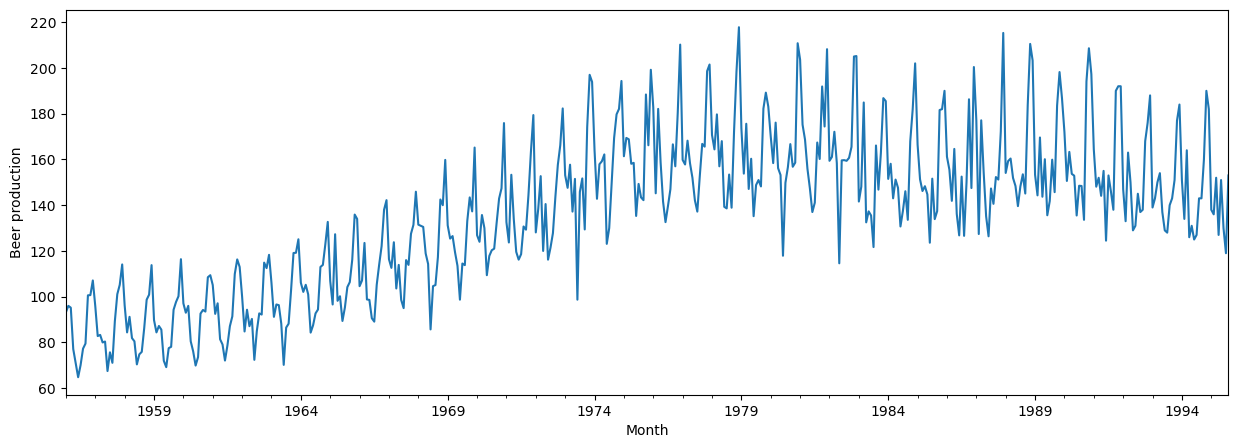

In [8]:
df.index = df.Month
plt.figure(figsize= (15,5))
df["Monthly beer production"].plot()
plt.xlabel('Month')
plt.ylabel('Beer production')

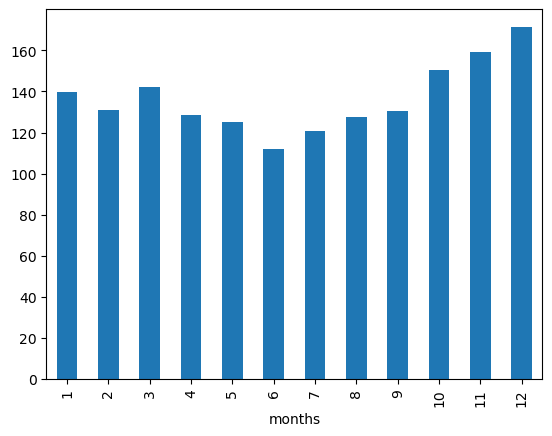

In [9]:
avg = df.groupby('months')['Monthly beer production'].mean().plot.bar()

<AxesSubplot:xlabel='Week', ylabel='Monthly beer production'>

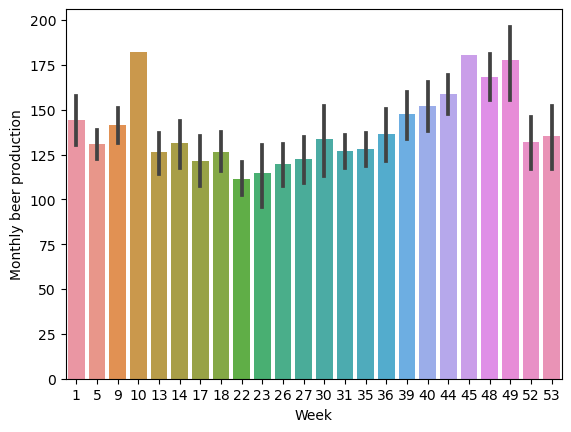

In [10]:
sns.barplot(x='Week',y='Monthly beer production',data=df)

<AxesSubplot:xlabel='Weekend', ylabel='Monthly beer production'>

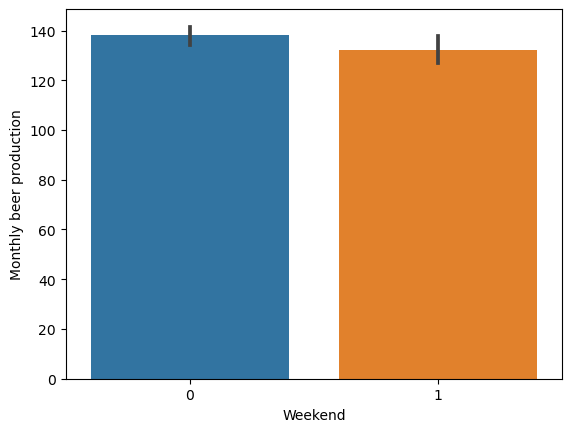

In [11]:
sns.barplot(x='Weekend',y='Monthly beer production',data=df)

<AxesSubplot:xlabel='months', ylabel='Monthly beer production'>

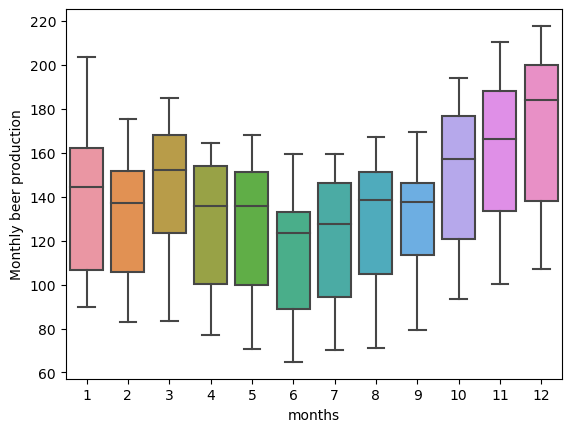

In [12]:
sns.boxplot(x=df.months,y=df['Monthly beer production'])

Text(0, 0.5, 'Monthly beer production')

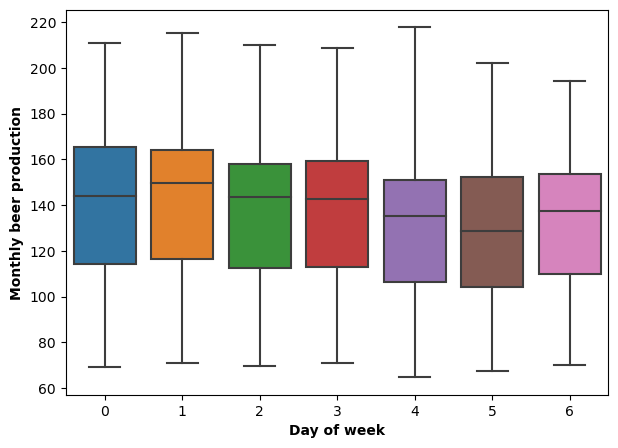

In [13]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=0)
sns.boxplot(x=df['Day of week'],y=df['Monthly beer production'])
ax = plt.gca()
ax.set_xlabel('Day of week',fontweight='bold')
ax.set_ylabel('Monthly beer production',fontweight='bold')

<AxesSubplot:xlabel='Week', ylabel='Monthly beer production'>

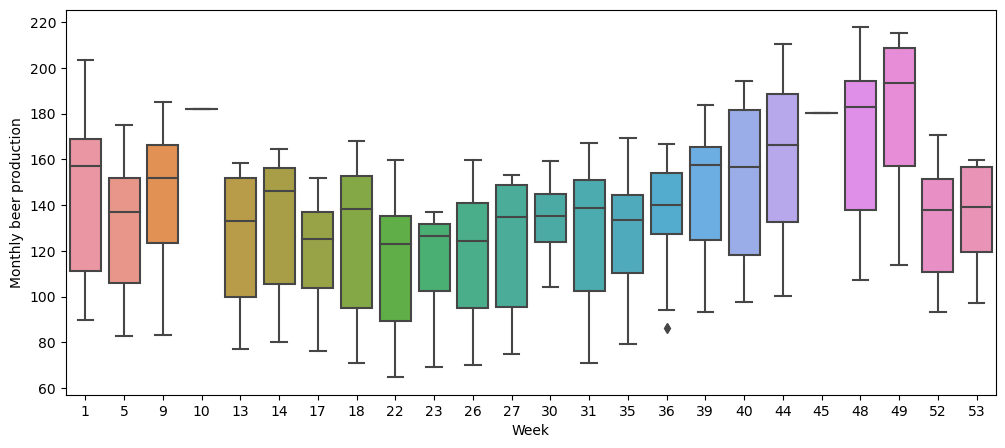

In [14]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df['Week'],y=df['Monthly beer production'])

In [16]:
month = df.resample('M').mean()
month

,Monthly beer production,Day,Year,months,Day of week,Week,Weekend
Month,,,,,,,
1956-01-31,93.2,1.0,1956.0,1.0,6.0,52.0,1.0
1956-02-29,96.0,1.0,1956.0,2.0,2.0,5.0,0.0
1956-03-31,95.2,1.0,1956.0,3.0,3.0,9.0,0.0
1956-04-30,77.1,1.0,1956.0,4.0,6.0,13.0,1.0
1956-05-31,70.9,1.0,1956.0,5.0,1.0,18.0,0.0
...,...,...,...,...,...,...,...
1995-04-30,127.0,1.0,1995.0,4.0,5.0,13.0,1.0
1995-05-31,151.0,1.0,1995.0,5.0,0.0,18.0,0.0
1995-06-30,130.0,1.0,1995.0,6.0,3.0,22.0,0.0


In [20]:
day  = df.resample("D").mean()
day.dropna(inplace=True)

In [29]:
year  = df.resample("Y").mean()
year.dropna(inplace=True)
year

,Monthly beer production,Day,Year,months,Day of week,Week,Weekend
Month,,,,,,,
1956-12-31,86.041667,1.0,1956.0,6.5,3.583333,28.583333,0.416667
1957-12-31,87.200000,1.0,1957.0,6.5,3.000000,24.500000,0.250000
1958-12-31,87.925000,1.0,1958.0,6.5,2.833333,24.666667,0.333333
1959-12-31,87.700000,1.0,1959.0,6.5,3.250000,24.750000,0.333333
1960-12-31,90.366667,1.0,1960.0,6.5,2.750000,28.500000,0.166667
1961-12-31,93.641667,1.0,1961.0,6.5,3.333333,28.500000,0.333333
1962-12-31,95.366667,1.0,1962.0,6.5,3.166667,24.333333,0.333333
1963-12-31,99.116667,1.0,1963.0,6.5,3.000000,24.500000,0.250000
1964-12-31,104.650000,1.0,1964.0,6.5,3.083333,24.750000,0.333333


In [21]:
day

,Monthly beer production,Day,Year,months,Day of week,Week,Weekend
Month,,,,,,,
1956-01-01,93.2,1.0,1956.0,1.0,6.0,52.0,1.0
1956-02-01,96.0,1.0,1956.0,2.0,2.0,5.0,0.0
1956-03-01,95.2,1.0,1956.0,3.0,3.0,9.0,0.0
1956-04-01,77.1,1.0,1956.0,4.0,6.0,13.0,1.0
1956-05-01,70.9,1.0,1956.0,5.0,1.0,18.0,0.0
...,...,...,...,...,...,...,...
1995-04-01,127.0,1.0,1995.0,4.0,5.0,13.0,1.0
1995-05-01,151.0,1.0,1995.0,5.0,0.0,18.0,0.0
1995-06-01,130.0,1.0,1995.0,6.0,3.0,22.0,0.0


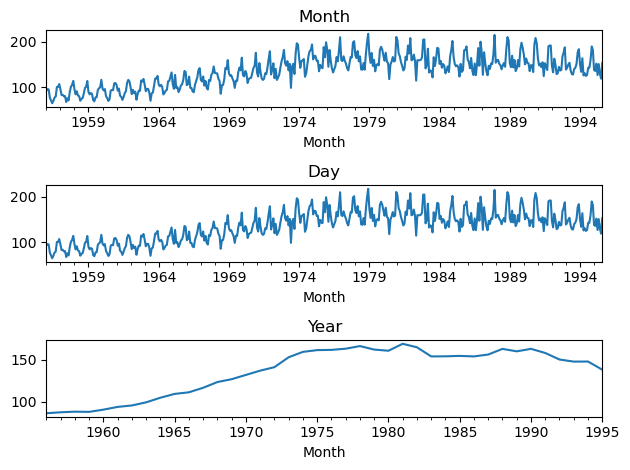

In [31]:
fig,ax = plt.subplots(3,1)
month['Monthly beer production'].plot(label='Months',title="Month",ax=ax[0])
day['Monthly beer production'].plot(label='Days',title="Day",ax=ax[1])
year['Monthly beer production'].plot(label='Years',title="Year",ax=ax[2])
fig.tight_layout()

In [32]:
df.Timestamp = pd.to_datetime(df.Month)
df.index = df.Timestamp
df = df.resample('M').mean()

C:\Users\haris\AppData\Local\Temp\ipykernel_8744\2451226314.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Timestamp = pd.to_datetime(df.Month)


In [33]:
df.head()

,Monthly beer production,Day,Year,months,Day of week,Week,Weekend
Month,,,,,,,
1956-01-31,93.2,1.0,1956.0,1.0,6.0,52.0,1.0
1956-02-29,96.0,1.0,1956.0,2.0,2.0,5.0,0.0
1956-03-31,95.2,1.0,1956.0,3.0,3.0,9.0,0.0
1956-04-30,77.1,1.0,1956.0,4.0,6.0,13.0,1.0
1956-05-31,70.9,1.0,1956.0,5.0,1.0,18.0,0.0


In [34]:
len(df)*0.7

333.2

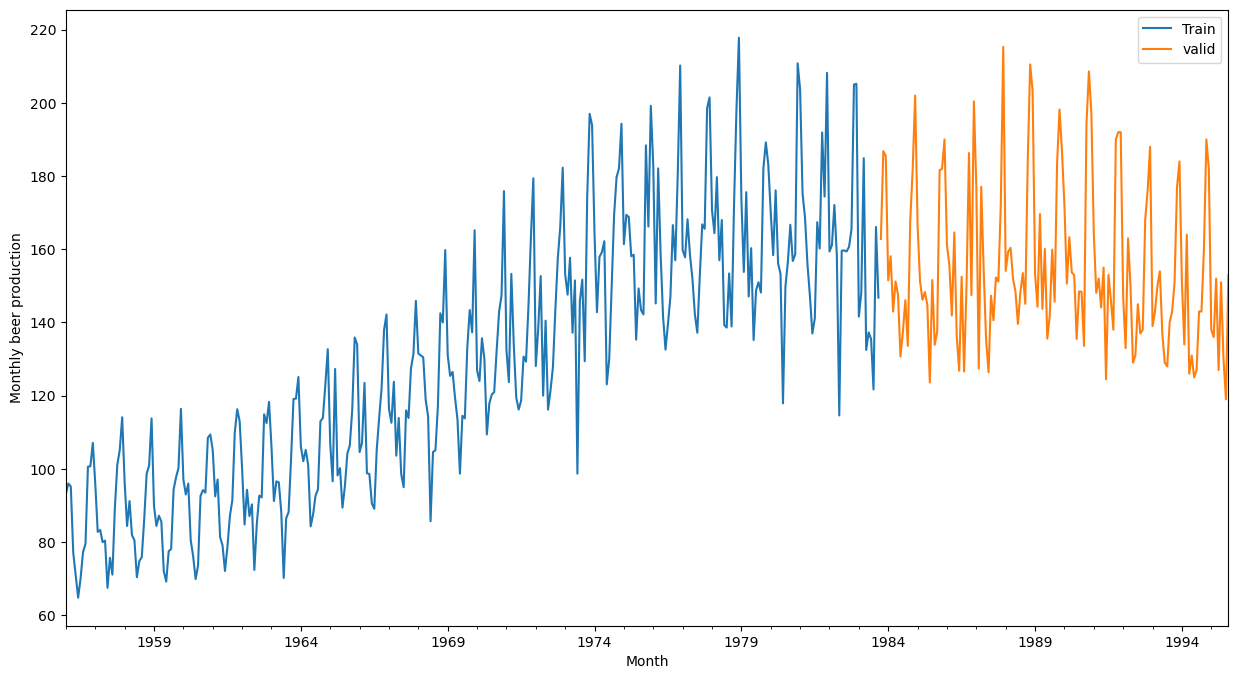

In [38]:
train = df.iloc[0:333]
valid = df.iloc[333:]
plt.figure(figsize=(15,8))
train['Monthly beer production'].plot(label='Train')
valid['Monthly beer production'].plot(label='valid')
plt.xlabel('Month')
plt.ylabel("Monthly beer production")
plt.legend(loc='best')
plt.savefig("Month beer productionTrainValid.png")

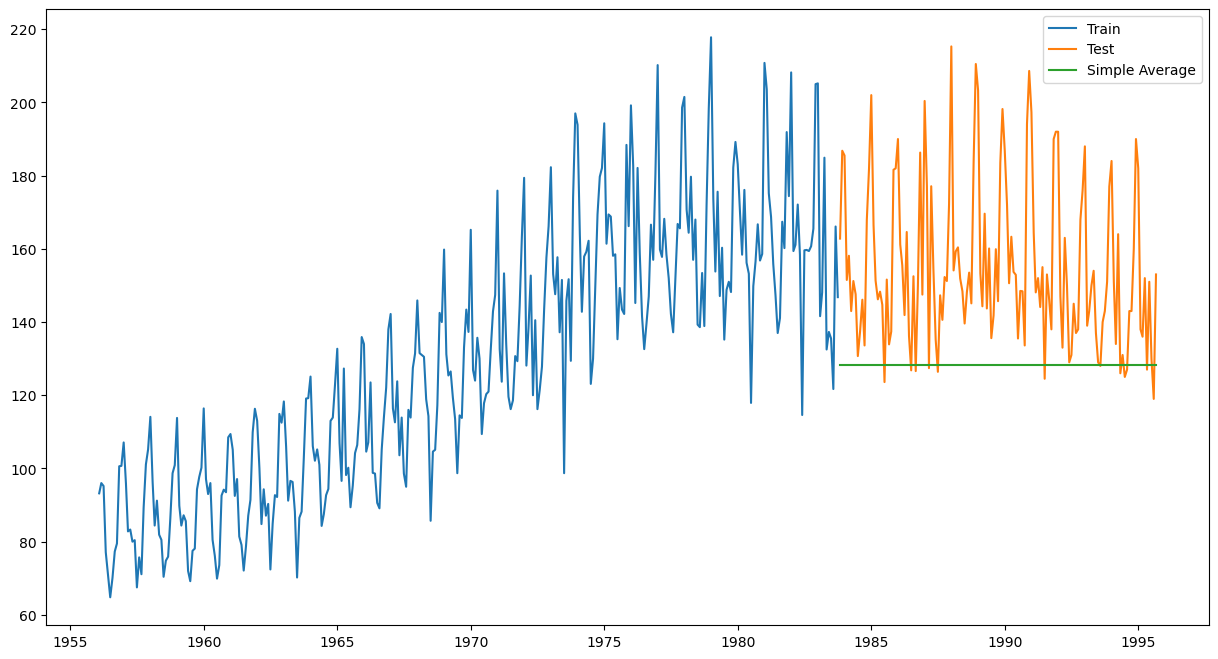

In [41]:
y_hat = valid.copy()
y_hat['Simple Average Forecast'] = np.asarray(
    train['Monthly beer production']).mean()
plt.figure(figsize=(15,8))
plt.plot(train['Monthly beer production'],label="Train")
plt.plot(valid['Monthly beer production'],label="Test")
plt.plot(y_hat['Simple Average Forecast'],label="Simple Average")
plt.legend(loc='best')

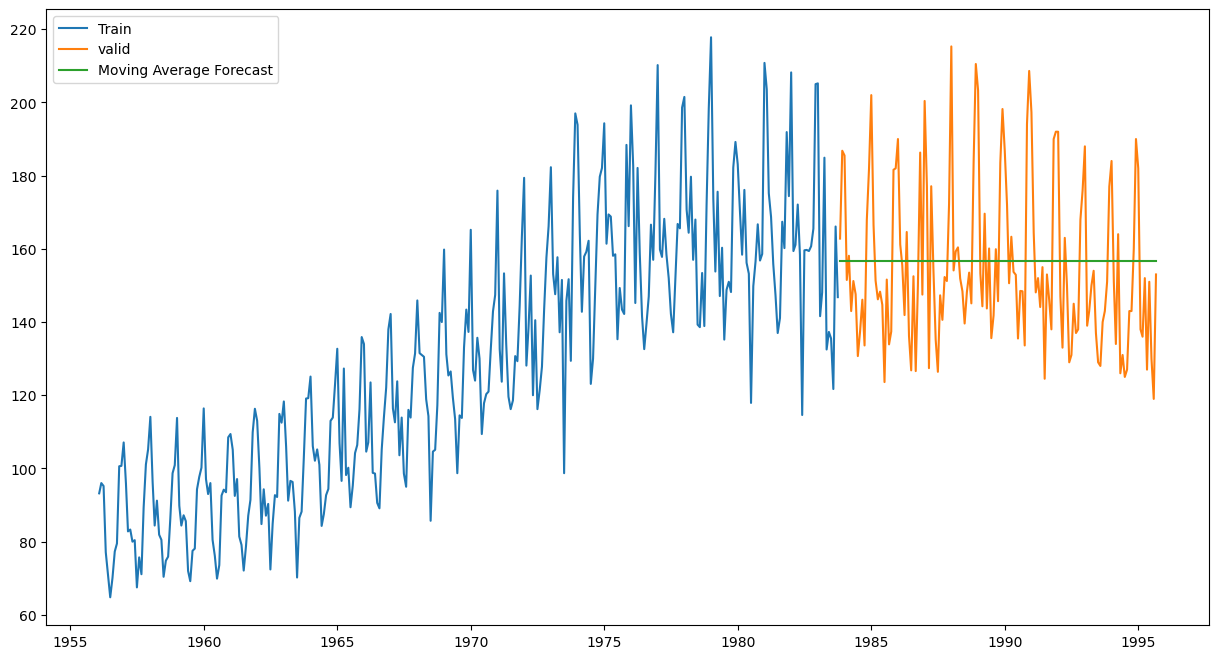

In [49]:
y_hat = valid.copy()
y_hat['Moving Average Forecast using 10 values']=train['Monthly beer production'].rolling(20).mean().iloc[-1]
plt.figure(figsize=(15,8))
plt.plot(train['Monthly beer production'],label='Train')
plt.plot(valid['Monthly beer production'],label='valid')
plt.plot(y_hat['Moving Average Forecast using 10 values'],label='Moving Average Forecast')
plt.legend(loc='best')

In [46]:
data = pd.DataFrame({"Value":[10,15,12,8,20,17,13,11]})
data

,Value
0,10
1,15
2,12
3,8
4,20
5,17
6,13
7,11


In [47]:
data['Rolling Average'] = data['Value'].rolling(3).mean()

In [48]:
data

,Value,Rolling Average
0,10,NaN
1,15,NaN
2,12,12.333333
3,8,11.666667
4,20,13.333333
5,17,15.000000
6,13,16.666667
7,11,13.666667


In [58]:
train['Monthly beer production']

Month
1956-01-31     93.2
1956-02-29     96.0
1956-03-31     95.2
1956-04-30     77.1
1956-05-31     70.9
              ...  
1983-05-31    137.3
1983-06-30    135.5
1983-07-31    121.7
1983-08-31    166.1
1983-09-30    146.8
Freq: M, Name: Monthly beer production, Length: 333, dtype: float64